In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [82]:
# Define system of equations
def get_deriv(state, t, params):
    '''
    Computes the derivatives of a dynamical model of human immune response to influenza A virus infection.

    Parameters:
        state (array_like): An array-like object of length 10 representing the state of the system at time t.

        t (float): The current time point

        params (list): A list containing the values of parameters in the system of differential equations.

    Returns:
        array_like: An array of length 10 representing the derivatives of the state variables with respect to time.
            The elements of the array correspond to the elements of the state array in the same order.
    '''
    
    # Unpack parameters
    gammaV, gammaVA, gammaVH, alphaV, aV1, aV2, bHD, aR, gammaHV, bHF, bIE, aI, bMD, bMV, aM, bF, cF, bFH, aF, bEM, bEI, aE, bPM, aP, bA, gammaAV, aA, r = params
    
    # Unpack state variables
    V, H, I, M, F, R, E, P, A, S = state

    # Define proportion of dead cells
    D = 1 - H - R - I

    # Define differential equations
    dVdt = (gammaV * I) - (gammaVA * S * A * V) - (gammaVH * H * V) - (alphaV * V) - ((aV1 * V)/(1 + (aV2 * V)))
    dHdt = ((bHD * D) * (H + R)) + (aR * R) - (gammaHV * V * H) - (bHF * F * H)
    dIdt = (gammaHV * V * H) - (bIE * E * I) - (aI * I)
    dMdt = (((bMD * D) + (bMV * V)) * (1 - M)) - (aM * M)
    dFdt = (bF * M) + (cF * I) - (bFH * H * F) - (aF * F)
    dRdt = (bHF * F * H) - (aR * R)
    dEdt = (bEM * M * E) - (bEI * I * E) + (aE * (1 - E))
    dPdt = (bPM * M * P) + (aP * (1 - P))
    dAdt = (bA * P) - (gammaAV * S * A * V) - (aA * A)
    dSdt = (r * P) * (1 - S)

    # Return an array containing the derivative of each variable
    return np.array([dVdt, dHdt, dIdt, dMdt, dFdt, dRdt, dEdt, dPdt, dAdt, dSdt])


In [83]:
# Define standard parameters
gammaV = 510
gammaVA = 619.2
gammaVH = 1.02
alphaV = 1.7
aV1 = 100
aV2 = 23000
bHD = 4
aR = 1
gammaHV = 0.34
bHF = 0.01
bIE = 0.066
aI = 1.5
bMD = 1
bMV = 0.0037
aM = 1
bF = 250000
cF = 2000
bFH = 17
aF = 8
bEM = 8.8
bEI = 2.72
aE = 0.4
bPM = 11.5
aP = 0.4
bA = 0.043
gammaAV = 146.2
aA = 0.043
r = 3e-5

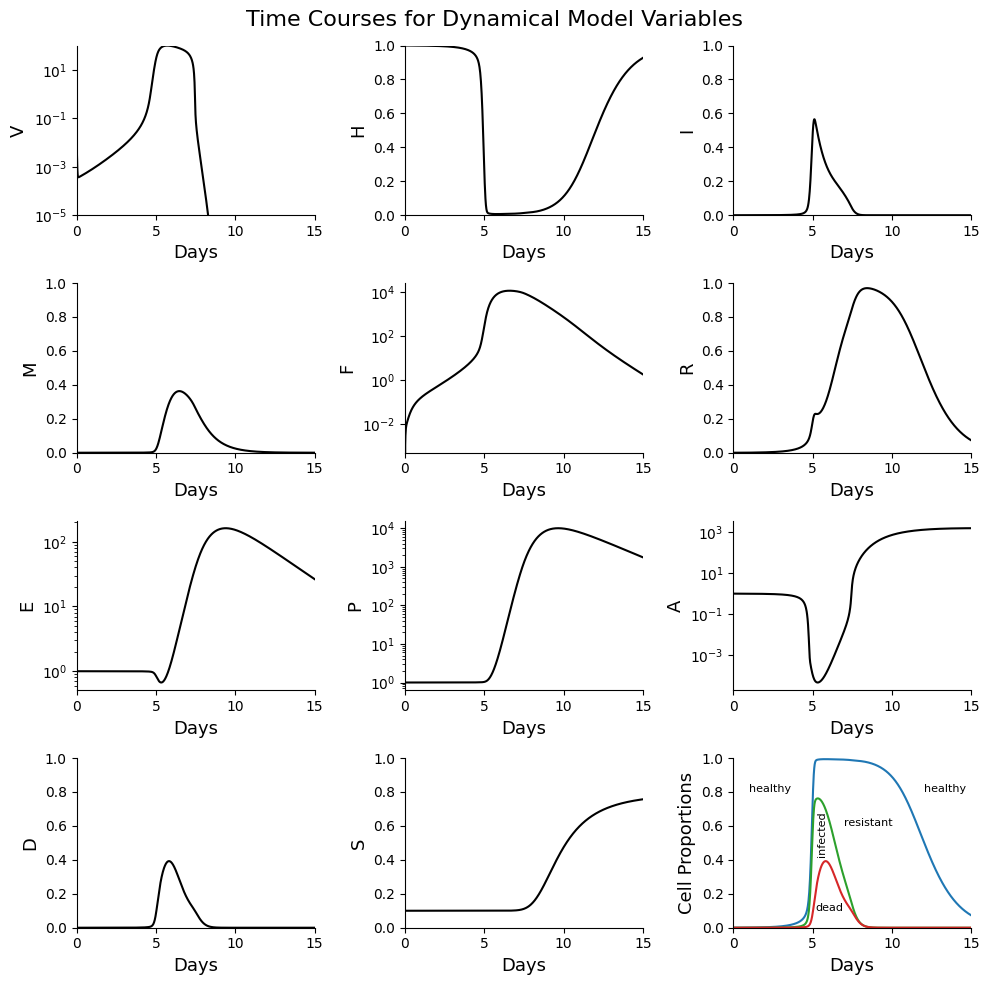

In [84]:
# Figure 1

# -------------- Time courses --------------

# Generate time array that contains 1000 equally-spaced values between 0 and 15
t = np.linspace(0, 15, 1000)

# Define parameters under standard conditions
params_std = [gammaV, gammaVA, gammaVH, alphaV, aV1, aV2, bHD, aR, gammaHV, bHF, bIE, aI, bMD, bMV, aM, bF, cF, bFH, aF, bEM, bEI, aE, bPM, aP, bA, gammaAV, aA, r]

# Define initial values for standard behavior
V0, H0, I0, M0, F0, R0, E0, P0, A0, S0 = 0.01, 1, 0, 0, 0, 0, 1, 1, 1, 0.1

# Initial state of the system with standard values
state0 = [V0, H0, I0, M0, F0, R0, E0, P0, A0, S0]

# Integrate the system of differential equations over time t
state = odeint(get_deriv, state0, t, args=(params_std,))

# Transpose state matrix to get individual time series for each variable
V, H, I, M, F, R, E, P, A, S = state.T

# Define proportion of dead cells
D = 1 - H - R - I

# Initialize subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(5, 10))
fig.set_figwidth(10)
fig.suptitle('Time Courses for Dynamical Model Variables', fontsize = 16)
fig.subplots_adjust(top=0.94)

# Initialize values, labels, and colors
F1_labels = ['V', 'H', 'I', 'M', 'F', 'R', 'E', 'P', 'A', 'D', 'S', 'Cell Proportions']
F1_vals = [V, H, I, M, F, R, E, P, A, D, S]

# Iterate through subplots, plotting each timecourse
for i, ax in enumerate(axes.flat):
    ax.set_xlim(0, 15)
    ax.set_xlabel('Days', fontsize=13)
    ax.set_ylabel(F1_labels[i], fontsize=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if i in [0]:
        ax.semilogy(t, F1_vals[i], color = 'k')
        ax.set_ylim(10**-5, 10**2)

    if i in [1, 2, 3, 5, 9, 10]:
        ax.plot(t, F1_vals[i], color = 'k')
        ax.set_ylim(0, 1.0)

    if i in [4, 6, 7, 8]:
        ax.semilogy(t, F1_vals[i], color = 'k')

    if i in [11]:
        ax.plot(t, np.max(H) - H, color = '#1f77b4')
        ax.plot(t, I+D, color = '#2ca02c')
        ax.plot(t, D, color = '#d62728')
        ax.text(5.2, 0.1, 'dead', fontsize=8)
        ax.text(5.3, 0.43, 'infected', fontsize=8, rotation=90)
        ax.text(7, 0.6, 'resistant', fontsize=8)
        ax.text(12, 0.8, 'healthy', fontsize=8)
        ax.text(1, 0.8, 'healthy', fontsize=8)
        ax.set_ylim(0, 1.0)

# Set layout, save figure, and show plots
fig.tight_layout()
plt.savefig('figure1', dpi = 300)
plt.show()

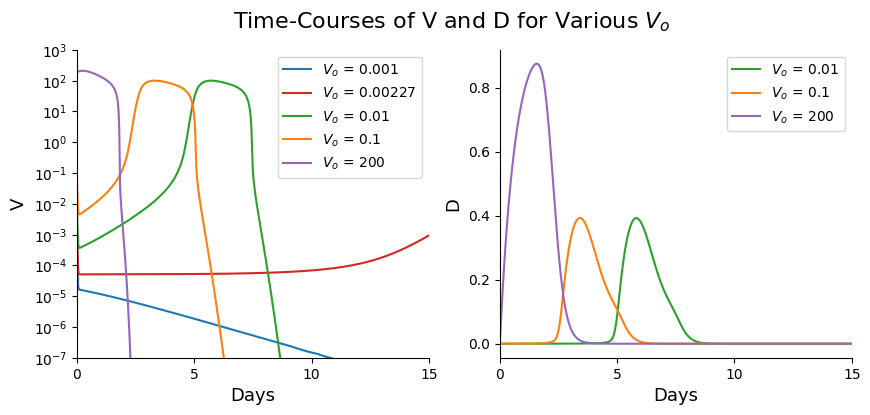

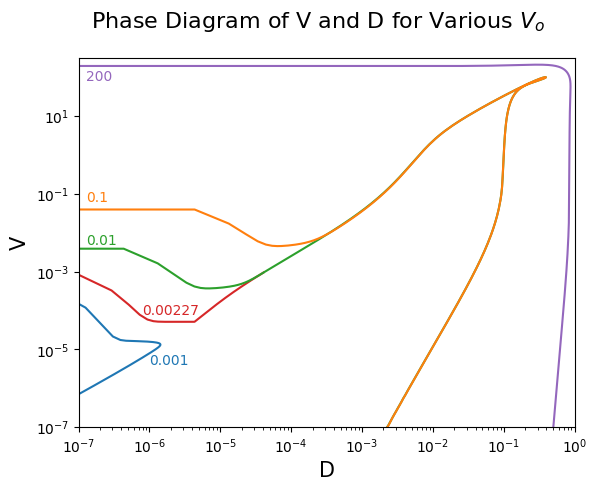

In [85]:
# Figure 2

# -------------- Time courses --------------

# List various values for initial viral load
V0_lst = [0.001, 0.00227, 0.01, 0.1, 200]

# Create empty lists to store results
V_VL, D_VL = [], []

# Loop through each value of initial viral load
for i in range(len(V0_lst)):
    
    # Define initial state with current viral load value
    state0 = [V0_lst[i], H0, I0, M0, F0, R0, E0, P0, A0, S0]
    
    # Solve ODEs using revised initial state and standard parameters
    state = odeint(get_deriv, state0, t, args=(params_std,))
    
    # Extract the results for V, H, I, and R
    V = state[:, 0]
    H = state[:, 1]
    I = state[:, 2]
    R = state[:, 5]

    # Calculate the results for the proportion of dead cells
    D = 1 - H - R - I
    
    # Append results to respective lists
    V_VL.append(V), D_VL.append(D)


# Initialize y axis labels, colors, and subplots
F2_labels = ['V', 'D']
colors = ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd'] # blue, red, green, orange, purple
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle(r'Time-Courses of V and D for Various $V_o$', fontsize = 16)

# Set plot parameters and labels for each subplot
for i, ax in enumerate(axes.flat):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if i in range(0, 2):
        xticks = np.arange(0, 16, 5)
        ax.set_xticks(xticks)
        ax.set_xlim(0, 15)
        ax.set_xlabel('Days', fontsize=13)
        ax.set_ylabel(F2_labels[i], fontsize=13)

# Plot time course of V for various initial viral loads
for i in range(len(V0_lst)):
    axes[0].semilogy(t, V_VL[i], color = colors[i], label=r'$V_o$ = {}'.format(V0_lst[i]))
yticks = [10**i for i in range(-7, 4)]
axes[0].set_ylim([yticks[0], yticks[-1]])
axes[0].set_yticks(yticks)
axes[0].legend()

# Plot time course of D for various initial vivral loads
for i in range(2, len(V0_lst)):
    axes[1].plot(t, D_VL[i], color = colors[i], label=r'$V_o$ = {}'.format(V0_lst[i]))
axes[1].legend()

# Save figure and show time courses
plt.savefig('figure2A', dpi = 300)
plt.show()

# -------------- Phase diagram --------------

# Initialize the phase diagram, title, and colors
fig, ax = plt.subplots()
fig.suptitle(r'Phase Diagram of V and D for Various $V_o$', fontsize = 16)
colors = ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd'] # blue, red, green, orange, purple

# Plot trajectories for different initial conditions
for i in range(len(V0_lst)):
    ax.plot(D_VL[i], V_VL[i], color = colors[i])

# Set labels and scales for the axes
ax.set_xlabel('D', fontsize=15)
ax.set_ylabel('V', fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10**-7, 10**0])
ax.set_ylim([10**-7, 10**2.5])

# Set annotations for each value of V0
ax.text(10**-6.9, 10**1.9, '200', fontsize=10, color = '#9467bd')
ax.text(10**-6.9, 10**-1.2, '0.1', fontsize=10, color = '#ff7f0e')
ax.text(10**-6.9, 10**-2.3, '0.01', fontsize=10, color = '#2ca02c')
ax.text(10**-6.1, 10**-4.1, '0.00227', fontsize=10, color = '#d62728')
ax.text(10**-6, 10**-5.4, '0.001', fontsize=10, color = '#1f77b4')


# Save figure, and show phase diagram
plt.savefig('figure2B', dpi = 300)
plt.show()

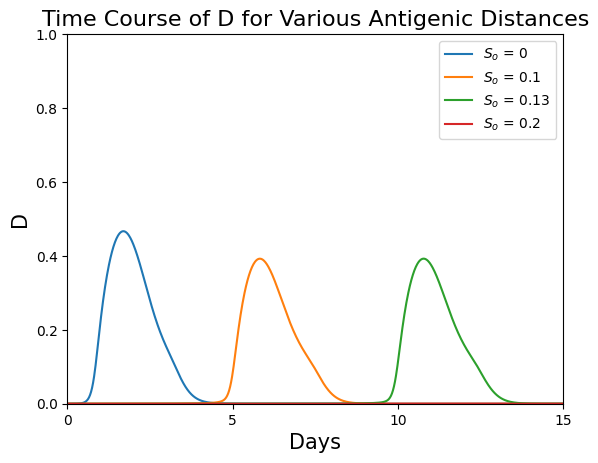

In [86]:
# Figure 3

# -------------- Time course --------------

# List various values for initial antigenic distance
S0_lst = [0, 0.1, 0.13, 0.2]

# Create empty lists to store results
V_AD, D_AD = [], []

# Loop through each value of initial antigenic distances
for i in range(len(S0_lst)):

    # Define initial state with current antigenic distance value
    state0 = [V0, H0, I0, M0, F0, R0, E0, P0, A0, S0_lst[i]]

    # Solve ODEs using revised initial state and standard parameters 
    state = odeint(get_deriv, state0, t, args=(params_std,))

    # Extract the results for V, H, I, and R
    V = state[:, 0]
    H = state[:, 1]
    I = state[:, 2]
    R = state[:, 5]

    # Calculate the results for the proportion of dead cells
    D = 1 - H - R - I

    # Append results to respective lists
    V_AD.append(V), D_AD.append(D)

# Plot trajectories for different initial conditions
for i in range(len(S0_lst)):
    plt.plot(t, D_AD[i], label=r'$S_o$ = {}'.format(S0_lst[i]))

# Set title and labels/scales for the axes
plt.title('Time Course of D for Various Antigenic Distances', fontsize = 16)
plt.xlabel('Days', fontsize=15)
plt.ylabel('D', fontsize=15)
xticks = np.arange(0, 16, 5)
plt.xticks(xticks)
plt.xlim(0, 15)
plt.ylim(0, 1.0)

# Add legend, save figure, and show time course
plt.legend()
plt.savefig('figure3', dpi = 300)
plt.show()


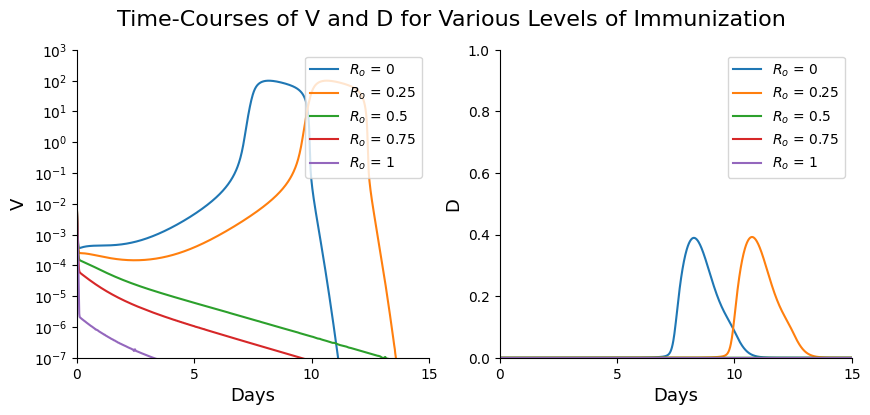

In [89]:
# Figure 4

# Generate time array that contains 1000 equally-spaced values between 0 and 15
t = np.linspace(0, 15, 1000)

# Set lists of applicable initial values to test various vaccination levels
R0_lst = [0, 0.25, 0.5, 0.75, 1]
H0_lst = R0_lst[::-1]


# Create empty lists to store results
V_IMM, D_IMM = [], []

for i in range(len(R0_lst)):

    # Define initial values for a system with revised initial states
    V0, H0, I0, M0, F0, R0, E0, P0, A0, S0 = 0.01, H0_lst[i], 0, 0.01, 0.01, R0_lst[i], 1, 1, 1, 0.1

    # Define initial state with current viral load value
    state0 = [V0, H0, I0, M0, F0, R0, E0, P0, A0, S0]

    # Solve ODEs using revised initial state and standard parameters
    state = odeint(get_deriv, state0, t, args=(params_std,))

    # Transpose state matrix to get individual time series for each variable
    V, H, I, M, F, R, E, P, A, S = state.T

    # Calculate the results for the proportion of dead cells
    D = 1 - H - R - I

    # Append results to respective lists
    V_IMM.append(V), D_IMM.append(D)

# Initialize y axis labels, title, and subplots
F7_labels = ['V', 'D']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle('Time-Courses of V and D for Various Levels of Immunization', fontsize = 16)

# Set plot parameters and labels for each subplot
for i, ax in enumerate(axes.flat):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if i in range(0, 2):
        xticks = np.arange(0, 16, 5)
        ax.set_xticks(xticks)
        ax.set_xlim(0, 15)
        ax.set_xlabel('Days', fontsize=13)
        ax.set_ylabel(F7_labels[i], fontsize=13)

# Plot time course of V for each gammaHV value
for i in range(len(R0_lst)):  
    axes[0].semilogy(t, V_IMM[i], label=r'$R_o$ = {}'.format(R0_lst[i]))
yticks = [10**i for i in range(-7, 4)]
axes[0].set_ylim([yticks[0], yticks[-1]])
axes[0].set_yticks(yticks)
axes[0].legend(loc = 'upper right')

# Plot time course of D for each gammaHV value
for i in range(len(R0_lst)):
    axes[1].plot(t, D_IMM[i], label=r'$R_o$ = {}'.format(R0_lst[i]))
axes[1].set_ylim(0, 1.0)
axes[1].legend()

# Save figure and show time courses
plt.savefig('figure4', dpi = 300)
plt.show()



In [77]:
# # Sensitivity Analysis - Not included in paper for brevity

# # -------------- Time courses --------------

# # List various values for gamma_HV
# gammaHV_lst = [0.1, 0.34, 1]

# # Create empty lists to store results
# V_gammaHV, D_gammaHV = [], []

# # Loop through each value of gammaHV
# for i in range(len(gammaHV_lst)):

#     # Set parameters for each gammaHV
#     params_gammaHV = [gammaV, gammaVA, gammaVH, alphaV, aV1, aV2, bHD, aR, gammaHV_lst[i], bHF, bIE, aI, bMD, bMV, aM, bF, cF, bFH, aF, bEM, bEI, aE, bPM, aP, bA, gammaAV, aA, r]
    
#     # Initial state of the system with standard values
#     state0 = [V0, H0, I0, M0, F0, R0, E0, P0, A0, S0]

#     # Solve ODEs using initial state and revised parameters
#     state = odeint(get_deriv, state0, t, args = (params_gammaHV,))

#     # Extract the results for V, H, I, and R
#     V = state[:, 0]
#     H = state[:, 1]
#     I = state[:, 2]
#     R = state[:, 5]

#     # Calculate the results for the proportion of dead cells
#     D = 1 - H - R - I

#     # Append results to respective lists
#     V_gammaHV.append(V), D_gammaHV.append(D)

# # Initialize y axis labels, colors, title, and subplots
# F4_labels = ['V', 'D']
# colors = ['#1f77b4', '#2ca02c', '#ff7f0e'] # blue, green, orange
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
# fig.suptitle(r'Time-Courses of V and D for Various $\gamma_{HV}$', fontsize = 16)

# # Set plot parameters and labels for each subplot
# for i, ax in enumerate(axes.flat):
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    
#     if i in range(0, 2):
#         xticks = np.arange(0, 16, 5)
#         ax.set_xticks(xticks)
#         ax.set_xlim(0, 15)
#         ax.set_xlabel('Days', fontsize=13)
#         ax.set_ylabel(F4_labels[i], fontsize=13)

# # Plot time course of V for each gammaHV value
# for i in range(len(gammaHV_lst)):  
#     axes[0].semilogy(t, V_gammaHV[i], color = colors[i], label=r'$\gamma$ = {}'.format(gammaHV_lst[i]))
# yticks = [10**i for i in range(-7, 4)]
# axes[0].set_ylim([yticks[0], yticks[-1]])
# axes[0].set_yticks(yticks)
# axes[0].legend()

# # Plot time course of D for each gammaHV value
# for i in range(1, len(gammaHV_lst)):
#     axes[1].plot(t, D_gammaHV[i], color = colors[i], label=r'$\gamma$ = {}'.format(gammaHV_lst[i]))
# axes[1].set_ylim(0, 1.0)
# axes[1].legend()

# # Save figure and show time courses
# plt.savefig('figure3A', dpi = 300)
# plt.show()

# # -------------- Phase diagram --------------

# # Redefine parameters for sensitivity analysis
# gammaHV_SA = 1
# gammaV_SA = 510
# gammaVA_SA = 619.2
# bMD_SA = 2
# bIE_SA = 0.066
# aI_SA = 1.5
# bHD_SA = 4
# bF_SA = 250000
# bA_SA = 0.043
# bHF_SA = 0.02
# bEM_SA = 8.3
# bPM_SA = 11.3

# # List various values for initial viral load
# V0_SA = [0.001, 0.01, 0.1, 200]

# # Create empty lists to store results
# V_SA, D_SA = [], []

# # Loop through length of V0_SA list
# for i in range(len(V0_SA)):

#     # Set parameters for sensitivity analysis
#     params_SA = [gammaV_SA, gammaVA_SA, gammaVH, alphaV, aV1, aV2, bHD_SA, aR, gammaHV_SA, bHF, bIE_SA, aI_SA, bMD_SA, bMV, aM, bF_SA, cF, bFH, aF, bEM_SA, bEI, aE, bPM_SA, aP, bA_SA, gammaAV, aA, r]
    
#     # Define initial state with current initial viral load
#     state0 = [V0_SA[i], H0, I0, M0, F0, R0, E0, P0, A0, S0]
    
#     # Solve ODEs using initial state and revised parameters
#     state = odeint(get_deriv, state0, t, args=(params_SA,))

#     # Extract the results for V, H, I, and R
#     V = state[:, 0]
#     H = state[:, 1]
#     I = state[:, 2]
#     R = state[:, 5]

#     # Calculate the results for the proportion of dead cells
#     D = 1 - H - R - I

#     # Append results to respective lists
#     V_SA.append(V), D_SA.append(D)

# # Initialize the phase diagram,set colors and title
# fig, ax = plt.subplots()
# colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd'] # blue, green, orange, purple
# fig.suptitle('Phase Diagram of V and D with Varied Parameters', fontsize = 16)

# # Plot trajectories for different initial conditions
# for i in range(len(V0_SA)):
#     ax.plot(D_SA[i], V_SA[i], color = colors[i])

# # Set labels and scales for the axes
# ax.set_xlabel('D', fontsize=15)
# ax.set_ylabel('V', fontsize=15)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim([10**-7, 10**0])
# ax.set_ylim([10**-7, 10**2.5])

# # Set annotations for each value of V0
# ax.text(10**-6.9, 10**1.9, '200', fontsize=10, color = '#9467bd')
# ax.text(10**-6.9, 10**-1.2, '0.1', fontsize=10, color = '#ff7f0e')
# ax.text(10**-6.9, 10**-2.2, '0.01', fontsize=10, color = '#2ca02c')
# ax.text(10**-6.9, 10**-3.3, '0.001', fontsize=10, color = '#1f77b4')

# # Save figure, and show phase diagram
# plt.savefig('figureSA', dpi = 300)
# plt.show()


In [78]:
# # Chronic State and Disease Recurrance - Not included in paper for brevity

# # -------------- Time courses --------------

# # Generate time array that contains 1000 equally-spaced values between 0 and 25
# t = np.linspace(0, 25, 1000)

# # Redefine r value for chronic state
# r_CS = 0

# # Define parameters with chronic state r value
# params_CS = [gammaV, gammaVA, gammaVH, alphaV, aV1, aV2, bHD, aR, gammaHV, bHF, bIE, aI, bMD, bMV, aM, bF, cF, bFH, aF, bEM, bEI, aE, bPM, aP, bA, gammaAV, aA, r_CS]

# # Define initial state with antigenic distance set to 0
# state0 = [V0, H0, I0, M0, F0, R0, E0, P0, A0, 0]

# # Solve ODEs using revised initial state and revised parameters 
# state = odeint(get_deriv, state0, t, args=(params_CS,))

# # Transpose state matrix to get individual time series for each variable
# V_CS, H_CS, I_CS, M_CS, F_CS, R_CS, E_CS, P_CS, A_CS, S_CS = state.T

# # Redefine r value for disease recurrence
# r_DR = 10**-5

# # Define parameters with disease recurrence r value
# params_DR = [gammaV, gammaVA, gammaVH, alphaV, aV1, aV2, bHD, aR, gammaHV, bHF, bIE, aI, bMD, bMV, aM, bF, cF, bFH, aF, bEM, bEI, aE, bPM, aP, bA, gammaAV, aA, r_DR]

# # Initial state of the system with standard values
# state0 = [V0, H0, I0, M0, F0, R0, E0, P0, A0, S0]

# # Solve ODEs using revised initial state and revised parameters 
# state = odeint(get_deriv, state0, t, args=(params_DR,))

# # Transpose state matrix to get individual time series for each variable
# V_DR, H_DR, I_DR, M_DR, F_DR, R_DR, E_DR, P_DR, A_DR, S_DR = state.T

# # Initialize subplots
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
# fig.set_figwidth(10)
# fig.suptitle('Time Courses for Chronic State and Disease Recurrence', fontsize = 16)
# fig.subplots_adjust(top=0.94)

# # Initialize labels, values, and titles for each subplot
# F6_labels = [r'$V_{CS}$', r'$H_{CS}$', r'$V_{DR}$', r'$H_{DR}$']
# F6_vals = [V_CS, H_CS, V_DR, H_DR]
# F6_titles = ['Viral Load in Chronic State', 'Healthy Cells in Chronic State', 'Viral Load in Disease Recurrence', 'Healthy Cells in Disease Recurrence']

# # Iterate through subplots, plotting each timecourse
# for i, ax in enumerate(axes.flat):
#     ax.set_xlim(0, 25)
#     ax.set_xlabel('Days', fontsize=13)
#     ax.set_ylabel(F6_labels[i], fontsize=13)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.set_title(F6_titles[i])

#     if i in [0, 2]:
#         ax.semilogy(t, F6_vals[i], color = 'k')
#         ax.set_ylim(10**-5, 10**2.5)

#     if i in [1, 3]:
#         ax.plot(t, F6_vals[i], color = 'k')
#         ax.set_ylim(0.0, 1.0)

# # Set layout, save figure, and show time courses
# fig.tight_layout()
# plt.savefig('figure4', dpi = 300)
# plt.show()
